# 3. Phase modulation by a moving mirror

In [2]:
%run pykat_notebook_defaults.py
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 0.8.3           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat

Imported matplotlib.pyplot as plt
Imported numpy as np


You can now use 'show_finesse(kat)' to display the Finesse code of a 'kat' object


In this section we go through what happens to a laser field that is reflected by a moving mirror. This basically explains how the laser field responds to gravitational waves even though, in that case, it is the length of the space itself that is oscillating. However, as long as the period time of the gravitational wave is much smaller than the time the laser beam spends in the arms of a simple Michelson, the result is the same.

<img src="mirror_modulation.svg" width=200 height=400/>

**Figure.** The figure depicts a moving mirror that has a static offset from a reference plane, as well as two laser beams: one propagating towards the mirror and one returning after having been reflected by the mirror.

The figure above shows a mirror that has a position determined by two terms: a static offset $\delta x$ and a time dependent|term $x_s(t)$. Thus, the positon relative to the reference plane can be written as

\begin{align}
x(t) = \delta x + x_s(t).
\end{align}

Further, we let the mirror motion be harmonic, with frequency, amplitude, and phase given by $a_s$, $\Omega_s$ and $\varphi_s$, respectively. Thus the time dependent term can be written

\begin{align}
x_s(t) = a_s \cos(\Omega_s t + \varphi_s).
\end{align}

A plane wave entering the reference plane can be described by $E_1(t) = E_0 \exp(i\omega_0 t)$, where $E_0$ is the complex amplitude and $\omega_0$ is the frequency of the carrier field. Then the field returning back from the mirror is given by

\begin{align}
E_2(t) =& E_1(t) \exp\big(-2ikx(t)\big) \\
=& E_1(t) \exp (-2ik\delta x) \exp\big[-2ik a_s \cos(\Omega t + \varphi_s) \big],
\end{align}

where we have assumed that the mirror has a reflectivity of one, and no phase shift occurs on reflection. The laser field now got two new phase factors: one due to the static offset, which we call **tuning**, and one due to the moving mirror which gives rise to an oscillating phase which yields the **phase modulation**. By using the identity

\begin{align}
\exp\big(iz\cos\varphi \big) = \sum_{n=-\infty}^{\infty} i^n J_n(z) \exp(in\varphi),
\end{align}

where $J_n(z)$ are Bessel functions of the first kind, we can write $E_2(t)$ as

\begin{align}
E_2(t) = E_1(t) \exp (2i\phi) \sum_{n=-\infty}^{\infty} i^n J_n(-2k a_s) \exp\big( ni(\Omega t + \varphi_s) \big),
\end{align}

where $\phi = -k\delta x$ is the phase due to the static tuning. In the sum, the term with $n=0$ will leave the frequency of the carrier unchanged. The other terms shift the the frequeny with $n\Omega$: these frequency components are called **sidebands** (of the carrier), where those with $n<0$ are called **lower sidebands** and those with $n>0$ are called **upper sidebands**. Since $m = -2ka_s \approx 10^{-11}$ ($k \approx 5.9 \times 10^{6}$ $\mathrm{m}^{-1}$ and $a_s < 10^{-18}$ $\mathrm{m}$ for LIGO), we can safely say that $|m| << 1$, which allows us to approximate the Bessel functions as

\begin{align}
&J_0(m) = 1 - \frac{m^2}{4} + \mathcal{O}(m^4) \\
&J_{\pm 1} (m) = \pm \frac{m}{2} + \mathcal{O}(m^3) \\
&J_{\pm n}(m) = 0 + \mathcal{O}(m^n), \quad n>1 .
\end{align}

Hence, we only need to keep the first pair of sidebands, and only terms up to first order in $m$. However, to formally see that amplitude is taken from the carrier to create the sidebands, we temporarliy keep the second order term for $J_0(m)$. The returning field can now be written as

\begin{align}
E_2(t) &= E_1(t) \exp (-2ik\delta x) \Big[ 1 - \frac{m^2}{4} + i \frac{m}{2}\Big( \exp\big( -i(\Omega t + \varphi_s)\big) + \exp\big( i(\Omega t + \varphi_s)\big) \Big) \Big] \\
       &= a_0 \mathrm{e}^{i\omega_0 t} + a_- \mathrm{e}^{i\omega_- t} + a_+ \mathrm{e}^{i \omega_+ t} ,
\end{align}

where in the second line $\omega_\pm = \omega_0 \pm \Omega$, and all phase factors have been absorbed into the complex amplitudes $a_0$, $a_-$ and $a_+$.

### Finesse example: creating sidebands by shaking a mirror

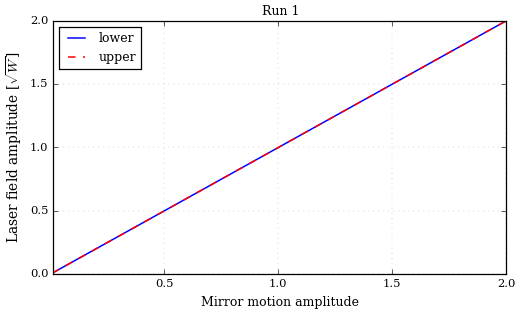

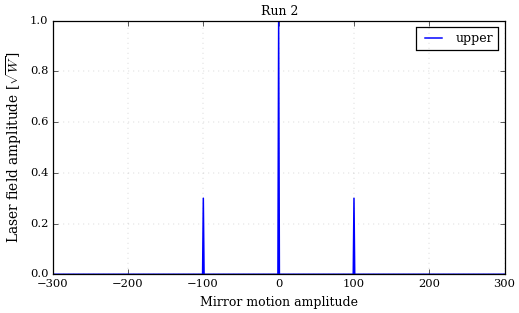

In [3]:
kat = finesse.kat()          # Initialising Finesse
kat.verbose = False          # Tells Finesse to talk less

# Parsing the code
kat.parseCommands("""
l laser 1 0 n0          # Laser with 0 offset wavelength (thus default 1064nm used)
s s1 1 n0 n1            # Space from laser to mirror (1 m)
m M1 1 0 0 n1 n2        # Mirror (ref=1, trans=0, tuning=0)
fsig sig1 M1 100 0 .3   # Shaking the mirror (freq = 100 Hz, phase = 0, amplitude = .3)

## Detectors ##
ad upper 100 n1         # Measuring amplitude of wawe with freq = 100 Hz (+ carrier freq)
ad lower -100 n1        # Measuring amplitude of wawe with freq = -100 Hz (+ carrier freq)
""")

# Run 1:
# -------
# Sweeping the amplitude of the mirror motion
# Parsing the code and running the simulation
kat1 = deepcopy(kat)
kat1.parseCommands("""
xaxis sig1 amp lin 0.01 2 500   
""")
out1 = kat1.run()

# Run 2:
# -------
# Sweeping the frequency of the amplitude detector
# Parsing the code and running the simulation
kat2 = deepcopy(kat)
kat2.parseCommands("""
xaxis upper f lin -300 300 600   
""")
out2 = kat2.run()

## Plotting ##
# -------------
fig = out1.plot(styles={'upper':'--r', 'lower': '-b'},
                xlabel='Mirror motion amplitude',
                ylabel='Laser field amplitude [$\sqrt{W}$]',
                title='Run 1')

fig = out2.plot(detectors=["upper"],
                xlabel='Mirror motion amplitude',
                ylabel='Laser field amplitude [$\sqrt{W}$]',
                title='Run 2')

<font size="2">**Figure.** The left figure shows the amplitude of the two first order sidebands as a function of the modulation index. The mirror is shaken at a frequency of 100 Hz. The right figure shows a histogram over the frequency components present in the laser field reflected by the moving mirror. </font>

The example shows that the amplitude of the first sideband pair increases with increasing amplitude of the mirror motion, as seen in the left figure above. The right figure shows the amplitudes of the carrier and the two sidebands when a modulation index of $m = 0.3$ is used. **Important remark:** Note that we have an input carrier field of 1 W, but sideband powers that exceed this. With other words, **do not use `fsig` in tis way** if you want physically relevant plots! This example was just to illustrate that new frequency components are created by the moving mirror. And that the mirror motion can be injected by using the command `fsig`. However, `fsig` is designed to be used when computing transfer functions, that is, the modulation index is infinitesimal so that we are in the linear regime. Examples of how `fsig` should be used follow later.

**Summary:** We have **phase modulated** the field by using a moving mirror, and shown that this can be viewed as creating **sideband pairs** around the carrier frecuency, spaced by integer multiples of the modulation frequency. For a small modulation index, meaning a small mirror motion compared to the carrier wavelength, only very few sidebands need to be considered. 